<a href="https://colab.research.google.com/github/HaSeoHyun/DataScience_Python_Practice/blob/main/2021313690_%ED%95%98%EC%84%9C%ED%98%84_Python%ED%99%9C%EC%9A%A9%EC%9D%B8%EB%AC%B8%EC%82%AC%ED%9A%8C%EA%B3%BC%ED%95%99%EB%85%BC%EB%AC%B8%EC%93%B0%EA%B8%B0_%EC%B5%9C%EC%A2%85%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2021313690 하서현 Python활용인문사회과학논문쓰기(CHS7004_I1)

라이브러리 임포트, 한글 폰트 설치

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 123595 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

# 1.데이터 선택 및 로드

##csv 파일을 dataframe으로 저장

In [ ]:
# 파일 경로(drive에 mount하는 방식이 아닌, 파일 업로드 방식)
data_2021 = '/content/외국학생 현황 (대학)_2021.csv'
data_2022 = '/content/외국학생 현황 (대학)_2022.csv'
data_2023 = '/content/외국학생 현황 (대학)_2023.csv'

data_reason = '/content/한국으로_유학_온_이유_복수응답__유학생.csv'
data_support = '/content/현재_받고_싶은_지원_복수응답__유학생.csv'

# CSV 파일을 데이터프레임 형식으로 저장
df_2021 = pd.read_csv(data_2021, header=None, skiprows=7)
df_2022 = pd.read_csv(data_2022, header=None, skiprows=7)
df_2023 = pd.read_csv(data_2023, header=None, skiprows=7)

df_reason = pd.read_csv(data_reason)
df_support = pd.read_csv(data_support)

# 새 헤더 이름 리스트(엑셀 파일을 csv 파일로 변환한 과정에서 헤더가 분리되었으므로 이를 보완함)
new_header = [
    '기준연도', '학교종류', '설립구분', '지역', '상태', '학교명', '유학생 총계', '학위과정 소계', '학위과정 인문사회계열',
    '학위과정 자연과학계열', '학위과정 공학계열', '학위과정 예체능계열', '학위과정 의학계열', '교육과정 공동운영생',
    '비학위과정 소계', '비학위과정 어학연수생', '비학위과정 교환학생', '비학위과정 방문학생', '비학위과정 기타연수생',
    '언어능력 소계', 'TOPIK 4급(예체능 3급)이상 학생수', '영어트랙 TOEFL 530 수준 이상 학생수', '영어권 외국인 유학생',
    '언어능력 충족 학생비율(%)', '기숙사 수용여부 학위과정 소계', '기숙사 학위과정 수용', '기숙사 학위과정 미수용',
    '기숙사 수용여부 비학위과정 소계', '기숙사 비학위과정 수용', '기숙사 비학위과정 미수용'
]


df_2021.columns = new_header
df_2022.columns = new_header
df_2023.columns = new_header


# 데이터 확인
df_2023.head(10)

,기준연도,학교종류,설립구분,지역,상태,학교명,유학생 총계,학위과정 소계,학위과정 인문사회계열,학위과정 자연과학계열,...,TOPIK 4급(예체능 3급)이상 학생수,영어트랙 TOEFL 530 수준 이상 학생수,영어권 외국인 유학생,언어능력 충족 학생비율(%),기숙사 수용여부 학위과정 소계,기숙사 학위과정 수용,기숙사 학위과정 미수용,기숙사 수용여부 비학위과정 소계,기숙사 비학위과정 수용,기숙사 비학위과정 미수용
0,2023.0,대학교,사립,경남,기존,가야대학교(김해),17,17,15,2.0,...,0,0.0,0.0,0.0,17.0,0.0,17,0.0,0.0,0
1,2023.0,대학교,사립,경기,기존,가천대학교,"2,743","2,412","1,940",46.0,...,605,151.0,0.0,31.3,2412.0,307.0,"2,105",331.0,176.0,155
2,2023.0,대학교,사립,강원,기존,가톨릭관동대학교,83,37,29,1.0,...,20,0.0,0.0,54.1,37.0,0.0,37,46.0,19.0,27
3,2023.0,대학교,사립,충북,기존,가톨릭꽃동네대학교,2,2,2,0.0,...,0,0.0,0.0,0.0,2.0,2.0,0,0.0,0.0,0
4,2023.0,대학교,사립,경기,기존,가톨릭대학교,815,484,354,73.0,...,76,0.0,0.0,15.7,484.0,283.0,201,331.0,195.0,136
5,2023.0,대학교,사립,서울,기존,가톨릭대학교 _제3캠퍼스,6,6,6,0.0,...,4,0.0,0.0,66.7,6.0,0.0,6,0.0,0.0,0
6,2023.0,대학교,사립,서울,기존,감리교신학대학교,1,1,1,0.0,...,0,0.0,0.0,0.0,1.0,0.0,1,0.0,0.0,0
7,2023.0,대학교,사립,경기,기존,강남대학교,124,105,93,0.0,...,8,0.0,0.0,7.6,105.0,56.0,49,19.0,16.0,3
8,2023.0,대학교,사립,서울,기존,강서대학교,516,478,478,0.0,...,3,187.0,3.0,40.4,478.0,0.0,478,38.0,0.0,38
9,2023.0,대학교,국립,강원,기존,강원대학교,393,167,112,21.0,...,92,0.0,0.0,55.1,167.0,17.0,150,226.0,133.0,93


# 2.데이터 정리 및 전처리
*   Pandas를 사용하여 데이터를 로드하고, 기본 정보를 확인합니다.
*   결측값 처리, 데이터 형식 변환 등 데이터 전처리를 수행합니다.



##df_reason과 df_spport 가공

###df_reason 가공

In [ ]:
# 첫 번째 행을 삭제하고 나머지 행들을 df_reason으로 할당
df_reason.columns = df_reason.iloc[0]
df_reason = df_reason.iloc[1:4]

# 새로운 DataFrame 출력
df_reason.head()

,특성별(1),특성별(2),교육 과정이 다른 나라에비해 우수하다고 생각해서 (%),한국에서의 전공과정이 내 관심 분야와 잘 맞아서 (%),공부하려는 분야가 한국과 관련된 것이어서 (%),한국 학위가 본국 또는 외국에서 취직하는데 도움이 될 것 같아서 (%),다른 나라와 비교할 때 입학 허가를 받기 쉬워서 (%),다른 나라에 비해 유학 비용이 적게 들어서 (%),장학금 혜택이 있어서 (%),"가족, 친인척, 친구, 교수 등의 권유로 (%)","주위에 한국에서 유학한 친구, 동료등이 있어서 (%)",예전에 방문한 적이 있어서 한국이 친숙하게 느껴졌기 때문에 (%),한국에 대한 호기심과 동경 때문에 (%),"한국에 가족,친척,친구 등이 살고 있어서 (%)",기타 (%)
1,성별,계,42.6,42.8,23.7,36.1,9.2,18.8,26.3,18.9,17.9,7.8,35.7,5.5,1.0
2,NaN,남자,46.4,38.1,19.1,38.6,9.7,19.6,26.8,24.8,18.9,5.3,32.0,7.1,0.9
3,NaN,여자,39.5,46.8,27.6,34.1,8.8,18.1,25.8,13.9,17.1,9.9,38.8,4.2,1.0


In [ ]:
print(df_reason.dtypes)

0
특성별(1)                                     object
특성별(2)                                     object
교육 과정이 다른 나라에비해 우수하다고 생각해서 (%)             object
한국에서의 전공과정이 내 관심 분야와 잘 맞아서 (%)             object
공부하려는 분야가 한국과 관련된 것이어서 (%)                 object
한국 학위가 본국 또는 외국에서 취직하는데 도움이 될 것 같아서 (%)    object
다른 나라와 비교할 때 입학 허가를 받기 쉬워서 (%)             object
다른 나라에 비해 유학 비용이 적게 들어서 (%)                object
장학금 혜택이 있어서 (%)                            object
가족, 친인척, 친구, 교수 등의 권유로 (%)                 object
주위에 한국에서 유학한 친구, 동료등이 있어서 (%)              object
예전에 방문한 적이 있어서 한국이 친숙하게 느껴졌기 때문에 (%)       object
한국에 대한 호기심과 동경 때문에 (%)                     object
한국에 가족,친척,친구 등이 살고 있어서 (%)                 object
기타 (%)                                     object
dtype: object


In [ ]:
# 각 열을 검사하고 숫자로 변환 가능한 데이터를 float64로 변환
for column in df_reason.columns:
    df_reason[column] = pd.to_numeric(df_reason[column], errors='ignore')

# 숫자형 데이터의 열을 float64로 변환
numeric_columns = df_reason.select_dtypes(include=['number']).columns
df_reason.loc[:, numeric_columns] = df_reason[numeric_columns].astype('float64')

In [ ]:
df_reason

,특성별(1),특성별(2),교육 과정이 다른 나라에비해 우수하다고 생각해서 (%),한국에서의 전공과정이 내 관심 분야와 잘 맞아서 (%),공부하려는 분야가 한국과 관련된 것이어서 (%),한국 학위가 본국 또는 외국에서 취직하는데 도움이 될 것 같아서 (%),다른 나라와 비교할 때 입학 허가를 받기 쉬워서 (%),다른 나라에 비해 유학 비용이 적게 들어서 (%),장학금 혜택이 있어서 (%),"가족, 친인척, 친구, 교수 등의 권유로 (%)","주위에 한국에서 유학한 친구, 동료등이 있어서 (%)",예전에 방문한 적이 있어서 한국이 친숙하게 느껴졌기 때문에 (%),한국에 대한 호기심과 동경 때문에 (%),"한국에 가족,친척,친구 등이 살고 있어서 (%)",기타 (%)
1,성별,계,42.6,42.8,23.7,36.1,9.2,18.8,26.3,18.9,17.9,7.8,35.7,5.5,1.0
2,NaN,남자,46.4,38.1,19.1,38.6,9.7,19.6,26.8,24.8,18.9,5.3,32.0,7.1,0.9
3,NaN,여자,39.5,46.8,27.6,34.1,8.8,18.1,25.8,13.9,17.1,9.9,38.8,4.2,1.0


In [ ]:
print(df_reason.dtypes)

0
특성별(1)                                      object
특성별(2)                                      object
교육 과정이 다른 나라에비해 우수하다고 생각해서 (%)             float64
한국에서의 전공과정이 내 관심 분야와 잘 맞아서 (%)             float64
공부하려는 분야가 한국과 관련된 것이어서 (%)                 float64
한국 학위가 본국 또는 외국에서 취직하는데 도움이 될 것 같아서 (%)    float64
다른 나라와 비교할 때 입학 허가를 받기 쉬워서 (%)             float64
다른 나라에 비해 유학 비용이 적게 들어서 (%)                float64
장학금 혜택이 있어서 (%)                            float64
가족, 친인척, 친구, 교수 등의 권유로 (%)                 float64
주위에 한국에서 유학한 친구, 동료등이 있어서 (%)              float64
예전에 방문한 적이 있어서 한국이 친숙하게 느껴졌기 때문에 (%)       float64
한국에 대한 호기심과 동경 때문에 (%)                     float64
한국에 가족,친척,친구 등이 살고 있어서 (%)                 float64
기타 (%)                                     float64
dtype: object


### df_support 가공

In [ ]:
# 첫 번째 행을 삭제하고 나머지 행들을 df_reason으로 할당
df_support.columns = df_support.iloc[0]
df_support = df_support.iloc[1:4]

# 새로운 DataFrame 출력
df_support.head()

,특성별(1),특성별(2),기숙사 제공 (%),수업료 감면 (%),유학생 동아리 지원 (%),출입국 업무 설명회 및 수속 대행 (%),아르바이트/ 취업 지원 (%),한국어 어학 지원 (%),받고 싶은 지원 없음 (%),기타 (%)
1,성별,계,12.5,51.1,19.0,12.3,40.0,39.6,5.4,1.1
2,NaN,남자,12.4,47.0,18.3,11.7,39.0,45.5,6.1,1.3
3,NaN,여자,12.5,54.5,19.6,12.8,40.8,34.7,4.8,1.0


In [ ]:
# 각 열을 검사하고 숫자로 변환 가능한 데이터를 float64로 변환
for column in df_support.columns:
    df_support[column] = pd.to_numeric(df_support[column], errors='ignore')

# 숫자형 데이터의 열을 float64로 변환
numeric_columns = df_support.select_dtypes(include=['number']).columns
df_support[numeric_columns] = df_support[numeric_columns].astype('float64')

<ipython-input-10-91a7f5838931>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support[column] = pd.to_numeric(df_support[column], errors='ignore')
<ipython-input-10-91a7f5838931>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_support[numeric_columns] = df_support[numeric_columns].astype('float64')


In [ ]:
df_support

,특성별(1),특성별(2),기숙사 제공 (%),수업료 감면 (%),유학생 동아리 지원 (%),출입국 업무 설명회 및 수속 대행 (%),아르바이트/ 취업 지원 (%),한국어 어학 지원 (%),받고 싶은 지원 없음 (%),기타 (%)
1,성별,계,12.5,51.1,19.0,12.3,40.0,39.6,5.4,1.1
2,NaN,남자,12.4,47.0,18.3,11.7,39.0,45.5,6.1,1.3
3,NaN,여자,12.5,54.5,19.6,12.8,40.8,34.7,4.8,1.0


In [ ]:
print(df_support.dtypes)

0
특성별(1)                     object
특성별(2)                     object
기숙사 제공 (%)                float64
수업료 감면 (%)                float64
유학생 동아리 지원 (%)            float64
출입국 업무 설명회 및 수속 대행 (%)    float64
아르바이트/ 취업 지원 (%)          float64
한국어 어학 지원 (%)             float64
받고 싶은 지원 없음 (%)           float64
기타 (%)                    float64
dtype: object


##결측치 제거

In [ ]:
# 결측치 개수 확인
missing_2021 = df_2021.isnull().sum()
print(missing_2021)

기준연도                        1
학교종류                        1
설립구분                        1
지역                          1
상태                          1
학교명                         1
유학생 총계                      1
학위과정 소계                     1
학위과정 인문사회계열                 1
학위과정 자연과학계열                 1
학위과정 공학계열                   1
학위과정 예체능계열                  1
학위과정 의학계열                   1
교육과정 공동운영생                  1
비학위과정 소계                    1
비학위과정 어학연수생                 1
비학위과정 교환학생                  1
비학위과정 방문학생                  1
비학위과정 기타연수생                 1
언어능력 소계                     1
TOPIK 4급(예체능 3급)이상 학생수      1
영어트랙 TOEFL 530 수준 이상 학생수    1
영어권 외국인 유학생                 1
언어능력 충족 학생비율(%)             1
기숙사 수용여부 학위과정 소계            1
기숙사 학위과정 수용                 1
기숙사 학위과정 미수용                1
기숙사 수용여부 비학위과정 소계           1
기숙사 비학위과정 수용                1
기숙사 비학위과정 미수용               1
dtype: int64


In [ ]:
#결측치 제거를 위해 결측치를 포함한 행을 모두 삭제
df_2021 = df_2021.dropna()

In [ ]:
# 결측치 개수 확인
missing_2021 = df_2021.isnull().sum()
print(missing_2021)

기준연도                        0
학교종류                        0
설립구분                        0
지역                          0
상태                          0
학교명                         0
유학생 총계                      0
학위과정 소계                     0
학위과정 인문사회계열                 0
학위과정 자연과학계열                 0
학위과정 공학계열                   0
학위과정 예체능계열                  0
학위과정 의학계열                   0
교육과정 공동운영생                  0
비학위과정 소계                    0
비학위과정 어학연수생                 0
비학위과정 교환학생                  0
비학위과정 방문학생                  0
비학위과정 기타연수생                 0
언어능력 소계                     0
TOPIK 4급(예체능 3급)이상 학생수      0
영어트랙 TOEFL 530 수준 이상 학생수    0
영어권 외국인 유학생                 0
언어능력 충족 학생비율(%)             0
기숙사 수용여부 학위과정 소계            0
기숙사 학위과정 수용                 0
기숙사 학위과정 미수용                0
기숙사 수용여부 비학위과정 소계           0
기숙사 비학위과정 수용                0
기숙사 비학위과정 미수용               0
dtype: int64


In [ ]:
#나머지 c파일도 결측치 제거
df_2022 = df_2022.dropna()
df_2023 = df_2023.dropna()

In [ ]:
#확인2
missing_2022 = df_2022.isnull().sum()
print(missing_2022)

기준연도                        0
학교종류                        0
설립구분                        0
지역                          0
상태                          0
학교명                         0
유학생 총계                      0
학위과정 소계                     0
학위과정 인문사회계열                 0
학위과정 자연과학계열                 0
학위과정 공학계열                   0
학위과정 예체능계열                  0
학위과정 의학계열                   0
교육과정 공동운영생                  0
비학위과정 소계                    0
비학위과정 어학연수생                 0
비학위과정 교환학생                  0
비학위과정 방문학생                  0
비학위과정 기타연수생                 0
언어능력 소계                     0
TOPIK 4급(예체능 3급)이상 학생수      0
영어트랙 TOEFL 530 수준 이상 학생수    0
영어권 외국인 유학생                 0
언어능력 충족 학생비율(%)             0
기숙사 수용여부 학위과정 소계            0
기숙사 학위과정 수용                 0
기숙사 학위과정 미수용                0
기숙사 수용여부 비학위과정 소계           0
기숙사 비학위과정 수용                0
기숙사 비학위과정 미수용               0
dtype: int64


데이터타입 확인 및 변환

In [ ]:
print(df_2021.dtypes)
#확인 결과, '학위과정 소계','학위과정 인문사회계열' 등 숫자형 데이터로 나타내야함에도 object형인 경우가 있었음

기준연도                        float64
학교종류                         object
설립구분                         object
지역                           object
상태                           object
학교명                          object
유학생 총계                       object
학위과정 소계                      object
학위과정 인문사회계열                  object
학위과정 자연과학계열                 float64
학위과정 공학계열                   float64
학위과정 예체능계열                   object
학위과정 의학계열                   float64
교육과정 공동운영생                  float64
비학위과정 소계                     object
비학위과정 어학연수생                  object
비학위과정 교환학생                  float64
비학위과정 방문학생                  float64
비학위과정 기타연수생                 float64
언어능력 소계                      object
TOPIK 4급(예체능 3급)이상 학생수       object
영어트랙 TOEFL 530 수준 이상 학생수    float64
영어권 외국인 유학생                 float64
언어능력 충족 학생비율(%)             float64
기숙사 수용여부 학위과정 소계            float64
기숙사 학위과정 수용                 float64
기숙사 학위과정 미수용                 object
기숙사 수용여부 비학위과정 소계           

In [ ]:
# 바로 object 데이터를 float64로 바꾸려 하였으나, 1,191처럼 중간에 콤마가 있는 숫자가 있었음
# 따라서 콤마를 제거하고 숫자로 변환 가능한 데이터를 float64로 변환
for column in df_2021.columns:
    # 먼저, 문자열로 변환하여 콤마를 제거
    df_2021[column] = df_2021[column].astype(str).str.replace(',', '')

    # 그 후, 숫자로 변환
    df_2021[column] = pd.to_numeric(df_2021[column], errors='ignore')

# 숫자형 데이터의 열을 float64로 변환
numeric_columns = df_2021.select_dtypes(include=['number']).columns
df_2021[numeric_columns] = df_2021[numeric_columns].astype('float64')

<ipython-input-19-8a851f768742>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021[column] = df_2021[column].astype(str).str.replace(',', '')
<ipython-input-19-8a851f768742>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021[column] = pd.to_numeric(df_2021[column], errors='ignore')
<ipython-input-19-8a851f768742>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [ ]:
print(df_2021.dtypes)

기준연도                        float64
학교종류                         object
설립구분                         object
지역                           object
상태                           object
학교명                          object
유학생 총계                      float64
학위과정 소계                     float64
학위과정 인문사회계열                 float64
학위과정 자연과학계열                 float64
학위과정 공학계열                   float64
학위과정 예체능계열                  float64
학위과정 의학계열                   float64
교육과정 공동운영생                  float64
비학위과정 소계                    float64
비학위과정 어학연수생                 float64
비학위과정 교환학생                  float64
비학위과정 방문학생                  float64
비학위과정 기타연수생                 float64
언어능력 소계                     float64
TOPIK 4급(예체능 3급)이상 학생수      float64
영어트랙 TOEFL 530 수준 이상 학생수    float64
영어권 외국인 유학생                 float64
언어능력 충족 학생비율(%)             float64
기숙사 수용여부 학위과정 소계            float64
기숙사 학위과정 수용                 float64
기숙사 학위과정 미수용                float64
기숙사 수용여부 비학위과정 소계           

In [ ]:
#다른 데이터에도 실행
for column in df_2022.columns:
    # 먼저, 문자열로 변환하여 콤마를 제거
    df_2022[column] = df_2022[column].astype(str).str.replace(',', '')

    # 그 후, 숫자로 변환
    df_2022[column] = pd.to_numeric(df_2022[column], errors='ignore')

# 숫자형 데이터의 열을 float64로 변환
numeric_columns = df_2022.select_dtypes(include=['number']).columns
df_2022[numeric_columns] = df_2022[numeric_columns].astype('float64')

print(df_2022.dtypes)

기준연도                        float64
학교종류                         object
설립구분                         object
지역                           object
상태                           object
학교명                          object
유학생 총계                      float64
학위과정 소계                     float64
학위과정 인문사회계열                 float64
학위과정 자연과학계열                 float64
학위과정 공학계열                   float64
학위과정 예체능계열                  float64
학위과정 의학계열                   float64
교육과정 공동운영생                  float64
비학위과정 소계                    float64
비학위과정 어학연수생                 float64
비학위과정 교환학생                  float64
비학위과정 방문학생                  float64
비학위과정 기타연수생                 float64
언어능력 소계                     float64
TOPIK 4급(예체능 3급)이상 학생수      float64
영어트랙 TOEFL 530 수준 이상 학생수    float64
영어권 외국인 유학생                 float64
언어능력 충족 학생비율(%)             float64
기숙사 수용여부 학위과정 소계            float64
기숙사 학위과정 수용                 float64
기숙사 학위과정 미수용                float64
기숙사 수용여부 비학위과정 소계           

In [ ]:
#다른 데이터에도 실행
for column in df_2023.columns:
    # 먼저, 문자열로 변환하여 콤마를 제거
    df_2023[column] = df_2023[column].astype(str).str.replace(',', '')

    # 그 후, 숫자로 변환
    df_2023[column] = pd.to_numeric(df_2023[column], errors='ignore')

# 숫자형 데이터의 열을 float64로 변환
numeric_columns = df_2023.select_dtypes(include=['number']).columns
df_2023[numeric_columns] = df_2023[numeric_columns].astype('float64')

In [ ]:
print(df_2023.dtypes)

기준연도                        float64
학교종류                         object
설립구분                         object
지역                           object
상태                           object
학교명                          object
유학생 총계                      float64
학위과정 소계                     float64
학위과정 인문사회계열                 float64
학위과정 자연과학계열                 float64
학위과정 공학계열                   float64
학위과정 예체능계열                  float64
학위과정 의학계열                   float64
교육과정 공동운영생                  float64
비학위과정 소계                    float64
비학위과정 어학연수생                 float64
비학위과정 교환학생                  float64
비학위과정 방문학생                  float64
비학위과정 기타연수생                 float64
언어능력 소계                     float64
TOPIK 4급(예체능 3급)이상 학생수      float64
영어트랙 TOEFL 530 수준 이상 학생수    float64
영어권 외국인 유학생                 float64
언어능력 충족 학생비율(%)             float64
기숙사 수용여부 학위과정 소계            float64
기숙사 학위과정 수용                 float64
기숙사 학위과정 미수용                float64
기숙사 수용여부 비학위과정 소계           

# 3.describe()를 통한 데이터 분석


* 데이터에 대한 요약을 describe()를 통해 확인합니다.




In [ ]:
df_2021.describe()

,기준연도,유학생 총계,학위과정 소계,학위과정 인문사회계열,학위과정 자연과학계열,학위과정 공학계열,학위과정 예체능계열,학위과정 의학계열,교육과정 공동운영생,비학위과정 소계,...,TOPIK 4급(예체능 3급)이상 학생수,영어트랙 TOEFL 530 수준 이상 학생수,영어권 외국인 유학생,언어능력 충족 학생비율(%),기숙사 수용여부 학위과정 소계,기숙사 학위과정 수용,기숙사 학위과정 미수용,기숙사 수용여부 비학위과정 소계,기숙사 비학위과정 수용,기숙사 비학위과정 미수용
count,222.0,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,...,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000
mean,2021.0,448.189189,322.261261,235.918919,14.220721,33.698198,38.072072,0.351351,4.198198,121.729730,...,128.995495,20.472973,2.824324,37.754054,315.887387,30.657658,285.229730,125.927928,37.103604,88.824324
std,0.0,661.601047,486.514219,395.212736,26.392974,58.495882,108.690037,1.453027,33.623903,217.017982,...,288.609970,74.150615,15.075999,29.003159,488.817107,52.234590,466.177026,219.758782,66.713700,183.025258
min,2021.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.0,36.500000,21.500000,8.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,13.600000,9.250000,0.250000,6.000000,0.000000,0.000000,0.000000
50%,2021.0,203.500000,146.500000,77.500000,2.000000,10.000000,3.000000,0.000000,0.000000,32.000000,...,29.500000,0.000000,0.000000,33.300000,132.000000,10.000000,91.500000,34.500000,5.500000,12.000000
75%,2021.0,504.500000,374.000000,255.750000,15.000000,36.000000,22.750000,0.000000,0.000000,141.000000,...,97.500000,0.000000,0.000000,55.900000,368.500000,39.750000,314.750000,144.750000,50.750000,89.500000
max,2021.0,4067.000000,3221.000000,2546.000000,159.000000,367.000000,1013.000000,12.000000,477.000000,1495.000000,...,2207.000000,567.000000,174.000000,100.000000,3221.000000,378.000000,3100.000000,1500.000000,613.000000,1239.000000


In [ ]:
df_2022.describe()

,기준연도,유학생 총계,학위과정 소계,학위과정 인문사회계열,학위과정 자연과학계열,학위과정 공학계열,학위과정 예체능계열,학위과정 의학계열,교육과정 공동운영생,비학위과정 소계,...,TOPIK 4급(예체능 3급)이상 학생수,영어트랙 TOEFL 530 수준 이상 학생수,영어권 외국인 유학생,언어능력 충족 학생비율(%),기숙사 수용여부 학위과정 소계,기숙사 학위과정 수용,기숙사 학위과정 미수용,기숙사 수용여부 비학위과정 소계,기숙사 비학위과정 수용,기숙사 비학위과정 미수용
count,221.0,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,...,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000,221.000000
mean,2022.0,485.180995,321.547511,234.493213,13.285068,34.380090,39.081448,0.307692,4.190045,159.443439,...,129.262443,21.561086,2.918552,38.054751,314.963801,31.425339,283.538462,163.538462,52.547511,110.990950
std,0.0,750.875322,488.512207,392.814930,23.428716,60.582478,116.154766,1.340076,33.999333,308.956312,...,276.865793,70.869805,16.052830,28.176637,491.058253,57.043206,462.388861,310.649795,84.222075,254.574743
min,2022.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022.0,41.000000,22.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,15.200000,10.000000,0.000000,7.000000,0.000000,0.000000,0.000000
50%,2022.0,229.000000,131.000000,85.000000,3.000000,9.000000,4.000000,0.000000,0.000000,49.000000,...,32.000000,0.000000,0.000000,34.800000,120.000000,10.000000,105.000000,54.000000,14.000000,18.000000
75%,2022.0,570.000000,375.000000,263.000000,14.000000,37.000000,22.000000,0.000000,0.000000,181.000000,...,106.000000,0.000000,0.000000,56.200000,361.000000,34.000000,328.000000,189.000000,74.000000,106.000000
max,2022.0,4751.000000,3206.000000,2489.000000,136.000000,342.000000,1043.000000,9.000000,483.000000,2264.000000,...,2206.000000,449.000000,203.000000,100.000000,3206.000000,440.000000,3055.000000,2264.000000,630.000000,2086.000000


In [ ]:
df_2023.describe()

,기준연도,유학생 총계,학위과정 소계,학위과정 인문사회계열,학위과정 자연과학계열,학위과정 공학계열,학위과정 예체능계열,학위과정 의학계열,교육과정 공동운영생,비학위과정 소계,...,TOPIK 4급(예체능 3급)이상 학생수,영어트랙 TOEFL 530 수준 이상 학생수,영어권 외국인 유학생,언어능력 충족 학생비율(%),기숙사 수용여부 학위과정 소계,기숙사 학위과정 수용,기숙사 학위과정 미수용,기숙사 수용여부 비학위과정 소계,기숙사 비학위과정 수용,기숙사 비학위과정 미수용
count,220.0,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2023.0,523.695455,323.081818,234.050000,13.627273,35.754545,39.404545,0.245455,3.554545,197.059091,...,124.272727,26.936364,2.381818,39.109545,322.740909,45.568182,277.172727,202.459091,74.527273,127.931818
std,0.0,765.342185,494.041670,390.899352,23.830972,64.161566,114.422094,1.290544,32.880324,319.827395,...,263.229154,89.738970,12.307685,27.605605,494.250395,85.100477,445.257083,324.739788,115.334392,248.817514
min,2023.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,43.500000,20.750000,9.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,17.600000,18.750000,0.000000,15.750000,0.000000,0.000000,0.000000
50%,2023.0,257.000000,146.000000,88.500000,2.500000,7.500000,6.000000,0.000000,0.000000,66.000000,...,33.500000,0.000000,0.000000,39.850000,146.000000,13.000000,96.000000,68.500000,29.000000,26.500000
75%,2023.0,619.250000,384.250000,273.750000,14.000000,43.250000,21.250000,0.000000,0.000000,238.750000,...,100.250000,0.000000,0.000000,57.100000,384.250000,49.000000,327.750000,243.000000,98.250000,139.000000
max,2023.0,4302.000000,2971.000000,2252.000000,147.000000,342.000000,989.000000,12.000000,468.000000,2108.000000,...,2116.000000,659.000000,131.000000,100.000000,2971.000000,534.000000,2719.000000,2112.000000,762.000000,1392.000000


In [ ]:
df_2023_degree = df_2023.iloc[:, 3:13]

print("2023년 학위과정 유학생 통계")
df_2023_degree

2023년 학위과정 유학생 통계


,지역,상태,학교명,유학생 총계,학위과정 소계,학위과정 인문사회계열,학위과정 자연과학계열,학위과정 공학계열,학위과정 예체능계열,학위과정 의학계열
0,경남,기존,가야대학교(김해),17.0,17.0,15.0,2.0,0.0,0.0,0.0
1,경기,기존,가천대학교,2743.0,2412.0,1940.0,46.0,208.0,218.0,0.0
2,강원,기존,가톨릭관동대학교,83.0,37.0,29.0,1.0,4.0,0.0,3.0
3,충북,기존,가톨릭꽃동네대학교,2.0,2.0,2.0,0.0,0.0,0.0,0.0
4,경기,기존,가톨릭대학교,815.0,484.0,354.0,73.0,39.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...
215,충남,기존,호서대학교,407.0,266.0,90.0,15.0,28.0,133.0,0.0
216,전북,기존,호원대학교,917.0,365.0,190.0,44.0,84.0,47.0,0.0
217,서울,기존,홍익대학교,1562.0,1094.0,50.0,0.0,55.0,989.0,0.0
218,세종,기존,홍익대학교 _제2캠퍼스,96.0,96.0,1.0,0.0,9.0,86.0,0.0


In [ ]:
#그룹화

result = df_2023_degree.groupby('지역').agg({
    '유학생 총계': ['sum', 'mean', 'max', 'min'],
    '학위과정 소계': ['sum', 'mean'],
    '학위과정 인문사회계열': ['sum', 'mean'],
    '학위과정 자연과학계열': ['sum', 'mean'],
    '학위과정 공학계열': ['sum', 'mean'],
    '학위과정 예체능계열': ['sum', 'mean'],
    '학위과정 의학계열': ['sum', 'mean']
})

print("지역별 집계 결과:")
result

지역별 집계 결과:


유학생 총계                               학위과정 소계             학위과정 인문사회계열  \
        sum         mean     max     min      sum        mean         sum   
지역                                                                          
강원   2606.0   260.600000   678.0     7.0   1816.0  181.600000      1532.0   
경기  13936.0   398.171429  2743.0     1.0   9414.0  268.971429      5828.0   
경남   1442.0   180.250000   489.0     1.0    697.0   87.125000       561.0   
경북   5388.0   283.578947  1415.0    10.0   3119.0  164.157895      2259.0   
광주   4057.0   450.777778   921.0    32.0   2650.0  294.444444      2038.0   
대구   3090.0  1545.000000  1719.0  1371.0   1617.0  808.500000      1121.0   
대전   6269.0   569.909091  2194.0     2.0   3641.0  331.000000      2482.0   
부산   8306.0   553.733333  1114.0     9.0   4988.0  332.533333      4057.0   
서울  51979.0   980.735849  4302.0     1.0  31126.0  587.283019     23641.0   
세종    572.0   190.666667   474.0     2.0    482.0  160.666667       282.0   
울산    414.0   207.000000   297.0   117.0    326.0  163.000000       178.0   
인천   2297.0   459.400000  1886.0     1.0   1446.0  289.200000      1069.0   
전남   1413.0   157.000000   437.0     1.0   1015.0  112.777778       744.0   
전북   4105.0   410.500000  1011.0     1.0   2920.0  292.000000      1696.0   
제주    466.0   233.000000   338.0   128.0    216.0  108.000000       124.0   
충남   6596.0   388.000000  1607.0     1.0   4164.0  244.941176      2884.0   
충북   2277.0   227.700000   711.0     2.0   1441.0  144.100000       995.0   

               학위과정 자연과학계열            학위과정 공학계열             학위과정 예체능계열  \
          mean         sum       mean       sum        mean        sum   
지역                                                                       
강원  153.200000        70.0   7.000000     163.0   16.300000       39.0   
경기  166.514286       412.0  11.771429    1045.0   29.857143     2129.0   
경남   70.125000        28.0   3.500000      96.0   12.000000       12.0   
경북  118.894737       215.0  11.315789     410.0   21.578947      223.0   
광주  226.444444       165.0  18.333333     270.0   30.000000      177.0   
대구  560.500000       140.0  70.000000     212.0  106.000000      144.0   
대전  225.636364       209.0  19.000000     657.0   59.727273      290.0   
부산  270.466667       163.0  10.866667     534.0   35.600000      234.0   
서울  446.056604       793.0  14.962264    2810.0   53.018868     3862.0   
세종   94.000000        45.0  15.000000      54.0   18.000000      101.0   
울산   89.000000        15.0   7.500000     118.0   59.000000       15.0   
인천  213.800000        34.0   6.800000     322.0   64.400000       20.0   
전남   82.666667        63.0   7.000000     152.0   16.888889       56.0   
전북  169.600000       214.0  21.400000     409.0   40.900000      599.0   
제주   62.000000        48.0  24.000000      26.0   13.000000       15.0   
충남  169.647059       309.0  18.176471     419.0   24.647059      552.0   
충북   99.500000        75.0   7.500000     169.0   16.900000      201.0   

              학위과정 의학계열            
         mean       sum      mean  
지역                                 
강원   3.900000      12.0  1.200000  
경기  60.828571       0.0  0.000000  
경남   1.500000       0.0  0.000000  
경북  11.736842      12.0  0.631579  
광주  19.666667       0.0  0.000000  
대구  72.000000       0.0  0.000000  
대전  26.363636       3.0  0.272727  
부산  15.600000       0.0  0.000000  
서울  72.867925      20.0  0.377358  
세종  33.666667       0.0  0.000000  
울산   7.500000       0.0  0.000000  
인천   4.000000       1.0  0.200000  
전남   6.222222       0.0  0.000000  
전북  59.900000       2.0  0.200000  
제주   7.500000       3.0  1.500000  
충남  32.470588       0.0  0.000000  
충북  20.100000       1.0  0.100000

# 4.언어능력 충족 학생비율 분표 그래프
* 유학생들의 언어 수준 확인을 위하여 언어능력 충족 학생 비율에 대한 분포를 그래프로 시각화하였습니다.

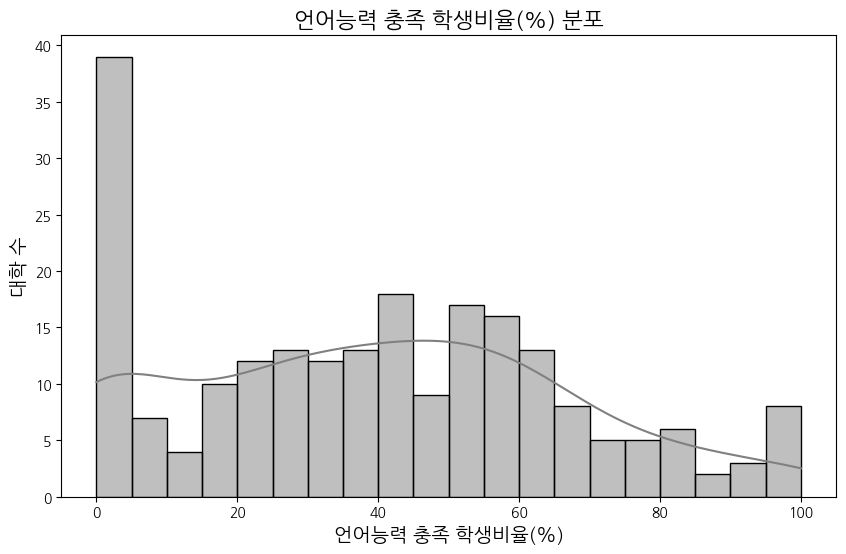

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임에서 '언어능력 충족 학생비율(%)' 컬럼만 선택
language_skill_rate = df_2023['언어능력 충족 학생비율(%)']

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 히스토그램으로 비율 분포 시각화
sns.histplot(language_skill_rate, bins=20, kde=True, color='grey')

# 그래프 제목 및 축 레이블 설정
plt.title('언어능력 충족 학생비율(%) 분포', fontsize=16)
plt.xlabel('언어능력 충족 학생비율(%)', fontsize=14)
plt.ylabel('대학 수', fontsize=14)

# 그래프 표시
plt.show()


#5.히스토그램으로 유학 이유와 원하는 지원 데이터 시각화
* 엑셀 데이터 상으로 숫자 데이터로 표기되었던 내용을 bar grapb로 표현하였습니다.

<ipython-input-30-cb94b968ebe2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_reasons.values, y=sorted_reasons.index, palette=palette)


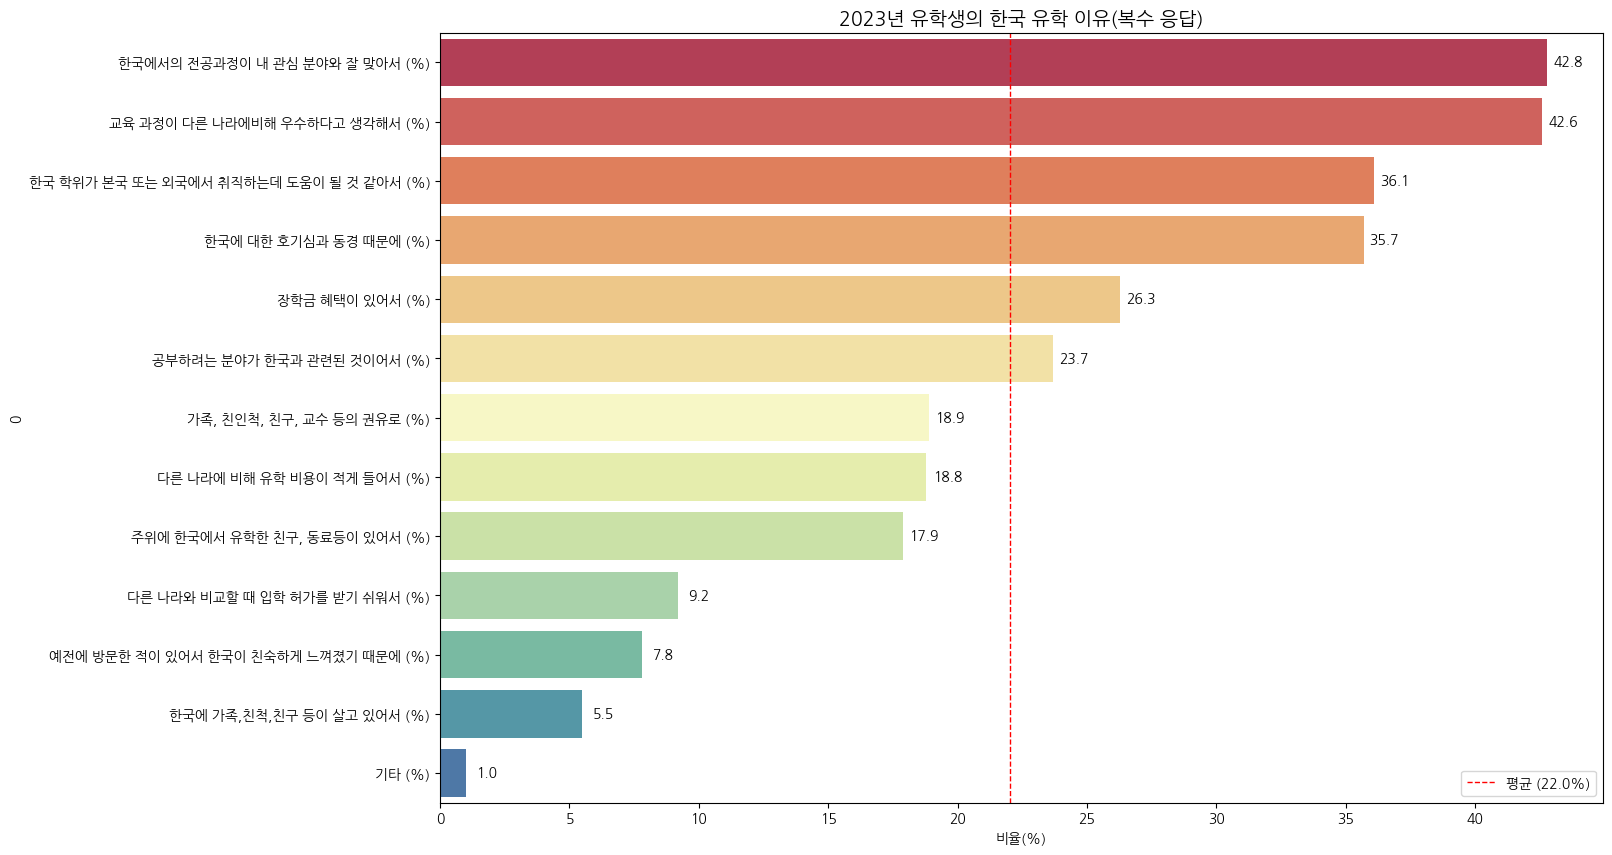

In [ ]:
#두 자료의 형식이 거의 유사하므로 함수를 이용해서 두 히스토그램을 동시에 만들어 봅시다
def plot_bar_chart(df, title):
    # 유학 이유 데이터 추출
    reason_data = df[df['특성별(2)'] == '계'].iloc[:, 2:]  # 전체 데이터
    reasons_counts = reason_data.sum()  # 각 유학 이유의 합계
    sorted_reasons = reasons_counts.sort_values(ascending=False)

    plt.figure(figsize=(15, 10))  # 그래프 크기 설정

    # 'spectral' 팔레트에서 색상 가져오기
    palette = sns.color_palette("Spectral", len(sorted_reasons))

    ax = sns.barplot(x=sorted_reasons.values, y=sorted_reasons.index, palette=palette)

    # 각 막대 위에 숫자 표시
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                    ha='center', va='center', xytext=(15, 0), textcoords='offset points')

    # 평균값 선 추가
    mean_value = sorted_reasons.mean()
    plt.axvline(x=mean_value, color='red', linestyle='--', linewidth=1, label=f'평균 ({mean_value:.1f}%)')

    plt.title(title, fontsize=14)  # 전달된 제목을 사용
    plt.xlabel('비율(%)')
    plt.legend()

    plt.show()

# 함수 호출 예시
plot_bar_chart(df_reason, '2023년 유학생의 한국 유학 이유(복수 응답)')

<ipython-input-30-cb94b968ebe2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sorted_reasons.values, y=sorted_reasons.index, palette=palette)


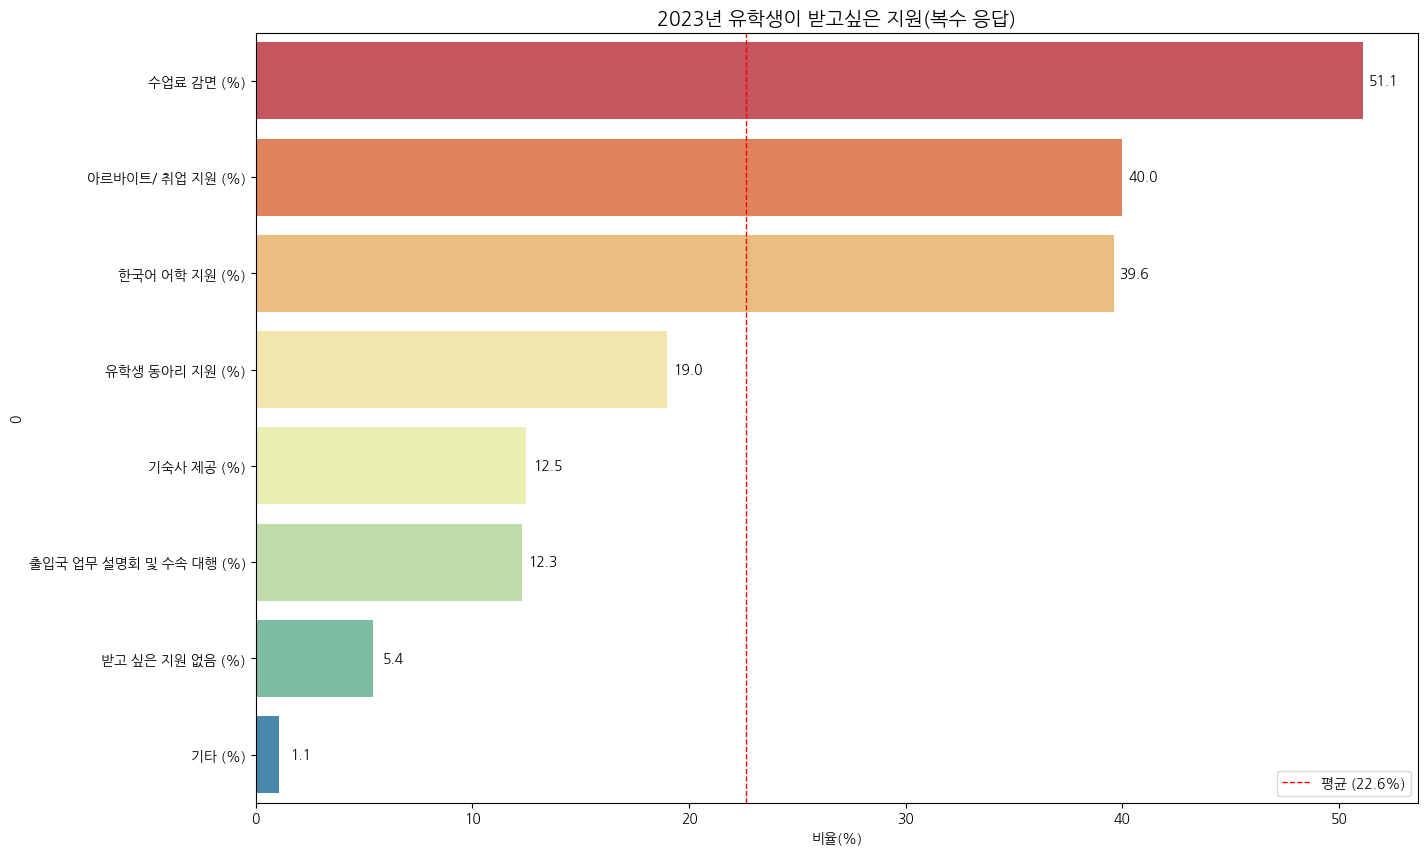

In [ ]:
plot_bar_chart(df_support, '2023년 유학생이 받고싶은 지원(복수 응답)')

#6.2023년 학위과정 유학생의 전공별 원그래프


*   유학생들의 전공 편향 문제를 보여주고자 근 3개년 데이터를 각각 원그래프로 표현하였습니다.



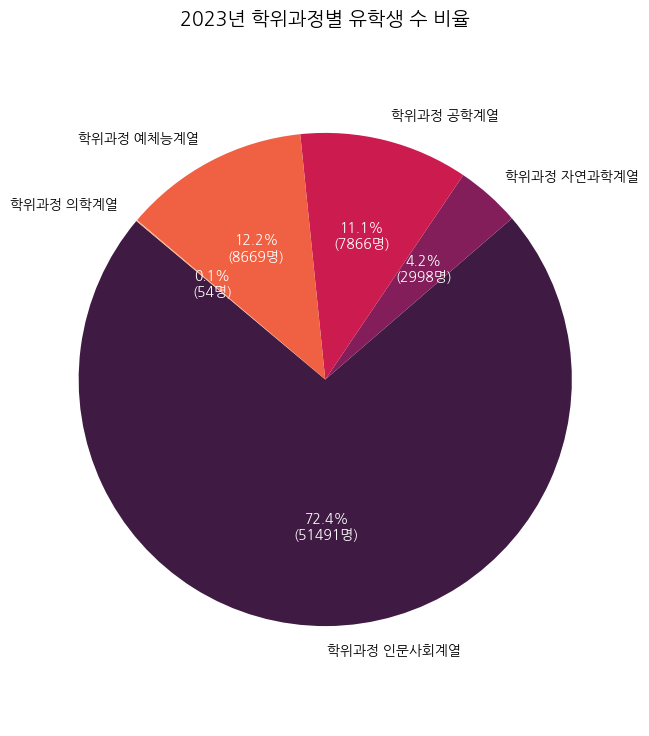

In [ ]:
def plot_pie_chart(df, title):
    # 학위과정별 총합 계산
    columns_to_plot = ['학위과정 인문사회계열', '학위과정 자연과학계열', '학위과정 공학계열', '학위과정 예체능계열', '학위과정 의학계열']
    data_to_plot = df[columns_to_plot].sum()

    # 'rocket' 팔레트에서 색상 가져오기
    colors = sns.color_palette("rocket", len(data_to_plot))

    # 비율 출력을 위한 함수 설정
    def make_autopct(data_to_plot):
        def autopct(pct):
            total = sum(data_to_plot)
            val = int(round(pct*total/100.0))
            return f'{pct:.1f}%\n({val}명)'
        return autopct

    plt.figure(figsize=(7, 9))
    wedges, texts, autotexts = plt.pie(data_to_plot, labels=data_to_plot.index, autopct=make_autopct(data_to_plot),
                                       startangle=140, colors=colors, textprops={'fontsize': 10})

    # 글씨 색상을 흰색으로 설정
    for i, autotext in enumerate(autotexts):
        if data_to_plot.values[i] in data_to_plot.nlargest(5).values:
            autotext.set_color('white')

    plt.title(title, fontsize=14)  # 제목 폰트 크기 설정
    plt.axis('equal')  # 원을 원형으로 유지
    plt.show()

# 2023년 함수 호출
plot_pie_chart(df_2023_degree, '2023년 학위과정별 유학생 수 비율')

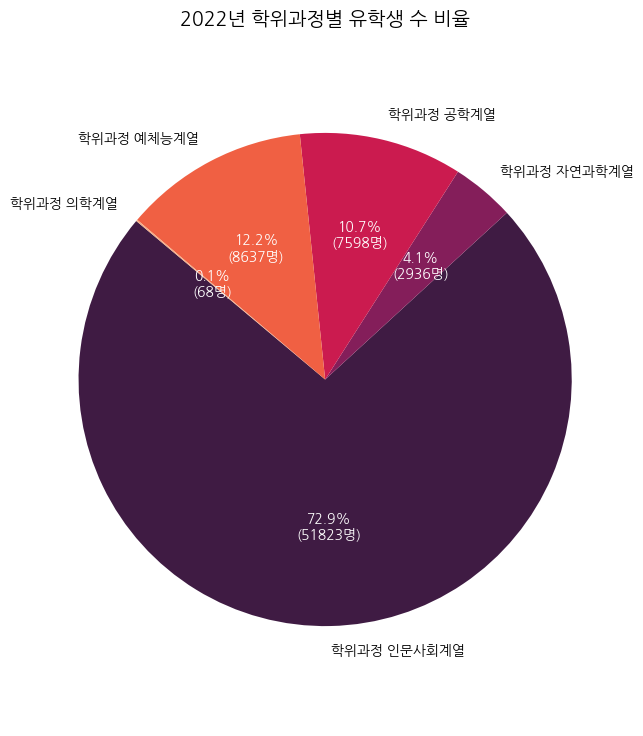

In [ ]:
#2022년
plot_pie_chart(df_2022, '2022년 학위과정별 유학생 수 비율')

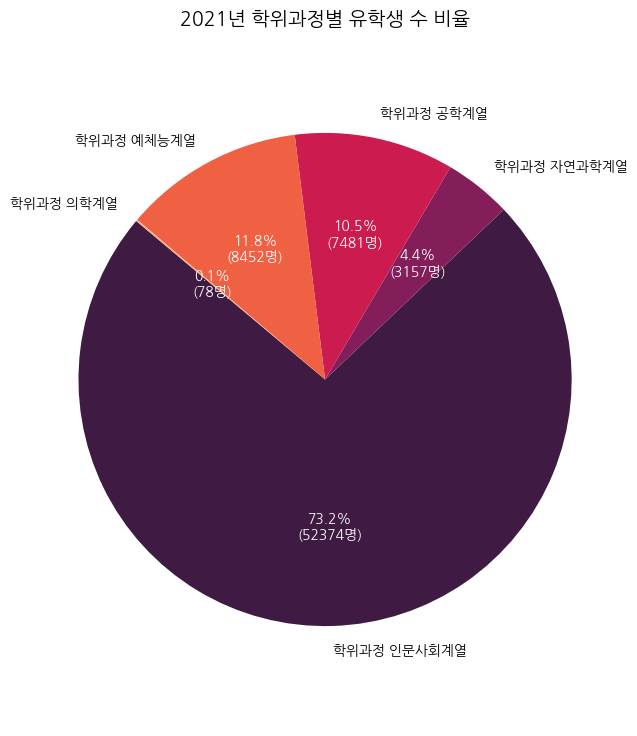

In [ ]:
#2021년
plot_pie_chart(df_2021, '2021년 학위과정별 유학생 수 비율')

#7.언어능력 분포


*   Pearson 상관계수 계산을 통해 얻은 관련성 높은 데이터들의 시각화를 위하여 한국어 일정 수준 이상 가능 비율-유학생 총계의 상관관계를 산점도로 나타내었습니다. 이를 통해, 두 변수 간 상관관계를 시각적으로 확인할 수 있습니다.



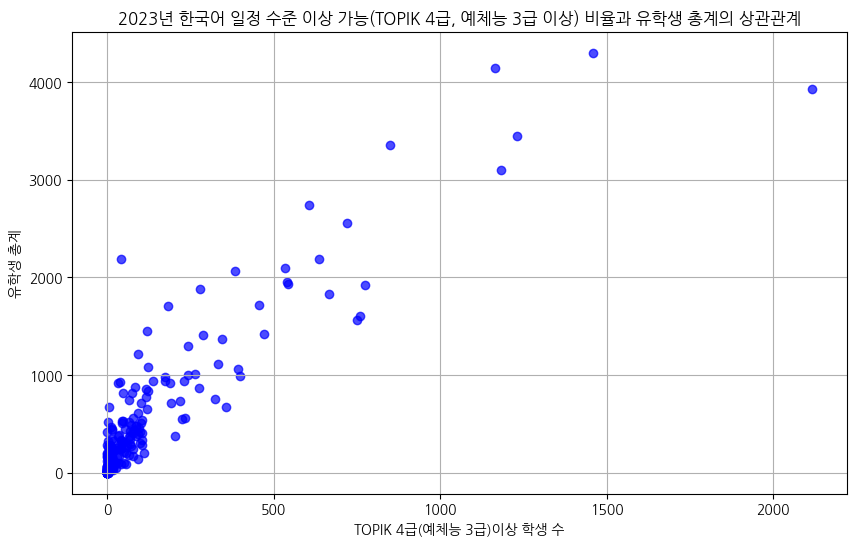

In [ ]:
sorted_df_2023 = df_2023.iloc[:, 6:]

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(sorted_df_2023['TOPIK 4급(예체능 3급)이상 학생수'], sorted_df_2023['유학생 총계'], color='blue', alpha=0.7)
plt.title('2023년 한국어 일정 수준 이상 가능(TOPIK 4급, 예체능 3급 이상) 비율과 유학생 총계의 상관관계')
plt.xlabel('TOPIK 4급(예체능 3급)이상 학생 수')
plt.ylabel('유학생 총계')
plt.grid(True)
plt.show()

#8.지도학습과 비지도학습 시행 (논문 미기재 데이터)
* 논문에는 사용하지 않았지만, 지도학습과 비지도학습을 시행한 내용입니다. 선형 회귀 중 다항회귀 기법과 PCA를 활용하였습니다.


## 데이터 스케일링

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# X와 y 정의 (X는 유학생 총계, y는 TOPIK 4급(예체능 3급)이상 학생수)
X = sorted_df_2023[['유학생 총계']].values.reshape(-1, 1)
y = sorted_df_2023['TOPIK 4급(예체능 3급)이상 학생수'].values.reshape(-1, 1)

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

## 지도학습 모델 구현 - 선형 회귀(Linear Regression)

In [ ]:
# 선형 회귀 모델 생성 및 학습
from sklearn.model_selection import train_test_split

#테스트 세트와 훈련 시트로 나누기
train_input, test_input, train_target, test_target = train_test_split(X,y,random_state = 24)

In [ ]:
train_iput = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [ ]:
#정확한 값을 도출하기 위한 다항 회귀
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [ ]:
print(train_poly.shape, test_poly.shape)

(165, 2) (55, 2)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.predict([[3500**2, 3500]]))

[[1228.95134281]]


In [ ]:
print(lr.coef_, lr.intercept_)

[[6.62293383e-05 1.17741424e-01]] [5.54696353]


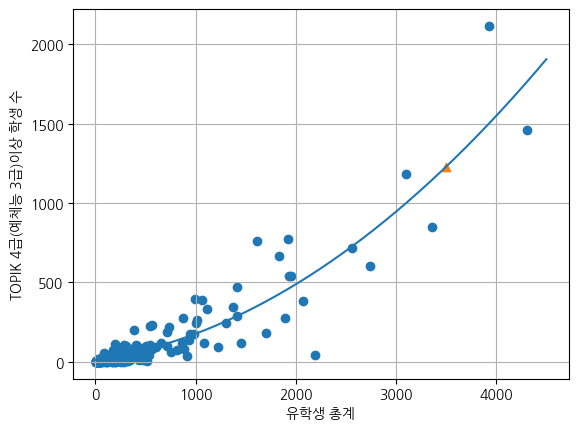

In [ ]:
#구간별 직선을 구리기 위해 0에서 4500까지 정수 배열 만들기
point = np.arange(0, 4500)

#훈련 세트의 산점도
plt.scatter(train_input, train_target)

#0에서 4500까지 2차 방정식 그래프 그리기
plt.plot(point, 7.30213028e-05 * point ** 2 + 9.24787395e-02 * point + 12.17860702 )
plt.scatter([3500],[1230], marker = '^')
plt.xlabel('유학생 총계')
plt.ylabel('TOPIK 4급(예체능 3급)이상 학생 수')
plt.grid(True)
plt.show()

In [ ]:
#score계산 (모델 성능 평가)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.8476195735774481
0.8576238056695108


## 비지도학습 모델 구현

In [ ]:
#관련 블로그 글:
# https://alasco-footprint.tistory.com/entry/5%EC%A3%BC%EC%B0%A8-%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5-%EC%A3%BC%EC%84%B1%EB%B6%84-%EB%B6%84%EC%84%9DPCA


# 필요한 데이터만 로드
# df_2023_degree만 사용함
df_2023_degree

,지역,상태,학교명,유학생 총계,학위과정 소계,학위과정 인문사회계열,학위과정 자연과학계열,학위과정 공학계열,학위과정 예체능계열,학위과정 의학계열
0,경남,기존,가야대학교(김해),17.0,17.0,15.0,2.0,0.0,0.0,0.0
1,경기,기존,가천대학교,2743.0,2412.0,1940.0,46.0,208.0,218.0,0.0
2,강원,기존,가톨릭관동대학교,83.0,37.0,29.0,1.0,4.0,0.0,3.0
3,충북,기존,가톨릭꽃동네대학교,2.0,2.0,2.0,0.0,0.0,0.0,0.0
4,경기,기존,가톨릭대학교,815.0,484.0,354.0,73.0,39.0,18.0,0.0
...,...,...,...,...,...,...,...,...,...,...
215,충남,기존,호서대학교,407.0,266.0,90.0,15.0,28.0,133.0,0.0
216,전북,기존,호원대학교,917.0,365.0,190.0,44.0,84.0,47.0,0.0
217,서울,기존,홍익대학교,1562.0,1094.0,50.0,0.0,55.0,989.0,0.0
218,세종,기존,홍익대학교 _제2캠퍼스,96.0,96.0,1.0,0.0,9.0,86.0,0.0


In [ ]:
from sklearn.cluster import KMeans

# 데이터 로드 (가정: df_2023_degree는 이미 로드된 상태)
# df_2023_degree = pd.read_csv('your_data_file.csv')

# 필요 없는 열 제거 (텍스트 데이터)
df_numeric = df_2023_degree.drop(columns=['지역', '상태', '학교명'])

# 결측치 처리 (필요시)
df_numeric = df_numeric.fillna(0)  # 간단한 결측치 처리

In [ ]:
# 데이터 표준화
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)


In [ ]:
# K-means 군집화
kmeans = KMeans(n_clusters=3, random_state=42)  # 클러스터 개수는 필요에 따라 조정
clusters = kmeans.fit_predict(df_scaled)

# 군집 결과를 원본 데이터 프레임에 추가
df_2023_degree['Cluster'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
#간혹 한글이 출력되지 않는 경우를 대비하여 한글 설치 다시 가져옴
%matplotlib inline

import matplotlib as mpl  # 기본 설정
import matplotlib.pyplot as plt  # 그래프 그리기
import matplotlib.font_manager as fm  # 폰트 관리

!apt-get update -qq         # apt-get 패키지 설치 명령어, -qq : 에러외 메세지 숨기기
!apt-get install fonts-nanum* -qq #나눔글꼴 설치

fe = fm.FontEntry(fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', name='NanumGothic') #파일 저장되어있는 경로와 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) #폰트설정

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


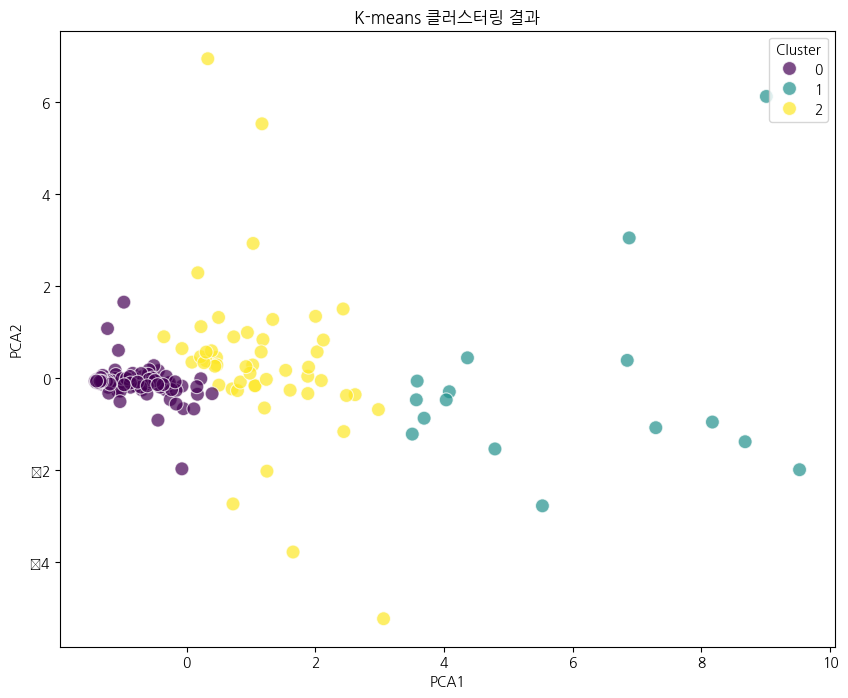

In [ ]:
# 데이터가 고차원인 경우 PCA를 사용하여 2D로 축소함
from sklearn.decomposition import PCA

# PCA를 사용하여 2D로 축소
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# 결과를 데이터프레임에 추가
df_pca_df = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca_df['Cluster'] = clusters

# 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('K-means 클러스터링 결과')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

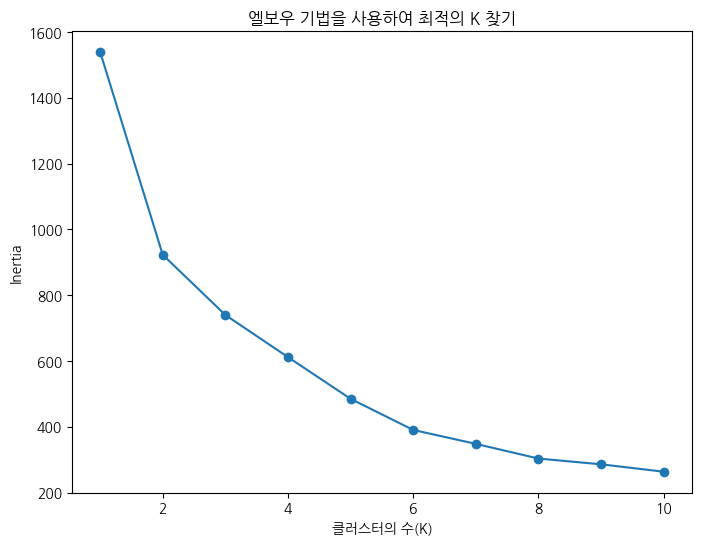

In [ ]:
# 엘보우 방법을 사용하여 최적의 K값 찾기
inertia = []
k_range = range(1, 11)  # K값의 범위 (1부터 10까지)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('엘보우 기법을 사용하여 최적의 K 찾기')
plt.xlabel('클러스터의 수(K)')
plt.ylabel('Inertia')
plt.show()